In [2]:
#pip install scikit-learn xgboost torch matplotlib

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.preprocessing import OneHotEncoder

In [6]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import numpy as np

# Load your dataset
data = pd.read_csv("EMIF_CBP.csv")

# Step 1: Treat 'State', 'Bordercity', and 'Sector' as categorical using Pandas categorical type
data['Border'] = data['Border'].astype('category')

# Step 2: One-hot encode 'Bordercity'
encoder = OneHotEncoder(drop='first', sparse_output=False)
encoded_border = pd.DataFrame(encoder.fit_transform(data[['Border']]), 
                                  columns=encoder.get_feature_names_out(['Border']))

# Merge the one-hot encoded 'Border' back into the dataset and drop original 'Border'
data = pd.concat([data, encoded_border], axis=1)
data = data.drop(columns=['Border'])

# Select relevant features
features = ['Age', 'Educ', 'Male', 'indig', 'eng', 'Married', 'emp', 'Companions', 'Aprehen', 'Experience',
            'Risk_Index', 'risk_water_food', 'risk_drown', 'risk_fall', 'risk_lost', 'risk_vas',
            'risk_cold_heat', 'risk_animals','risk_abandoned', 'hom_rt', 'Smugg_decision']

# X includes both numeric and categorical features
X = data[features]

# Target variable
target = 'risk_assaulted'
y = data[target]

# Step 2: Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


# Step 4: Train XGBoost with native categorical support
xgb_model = XGBClassifier(eval_metric='logloss')
xgb_model.fit(X_train, y_train)

# Step 5: Make predictions and evaluate the XGBoost model
y_pred = xgb_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"XGBoost Accuracy: {accuracy}")
print(f"Classification Report:\n{classification_report(y_test, y_pred)}")
print(f"Confusion Matrix:\n{confusion_matrix(y_test, y_pred)}")


models = {
    'RandomForest': RandomForestClassifier(n_estimators=100, random_state=42),
    'SVM': SVC(kernel='rbf', probability=True, class_weight='balanced', verbose=True),
    'NaiveBayes': GaussianNB()
}

for name, model in models.items():
    print(f"Training and evaluating model: {name}")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Model: {name}")
    print(f"Accuracy: {accuracy}")
    print(f"Classification Report:\n{classification_report(y_test, y_pred)}")
    print(f"Confusion Matrix:\n{confusion_matrix(y_test, y_pred)}\n")



XGBoost Accuracy: 0.9811320754716981
Classification Report:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      1441
           1       0.83      0.44      0.58        43

    accuracy                           0.98      1484
   macro avg       0.90      0.72      0.78      1484
weighted avg       0.98      0.98      0.98      1484

Confusion Matrix:
[[1437    4]
 [  24   19]]
Training and evaluating model: RandomForest
Model: RandomForest
Accuracy: 0.9777628032345014
Classification Report:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      1441
           1       1.00      0.23      0.38        43

    accuracy                           0.98      1484
   macro avg       0.99      0.62      0.68      1484
weighted avg       0.98      0.98      0.97      1484

Confusion Matrix:
[[1441    0]
 [  33   10]]

Training and evaluating model: SVM
[LibSVM]..
*.
*
optimization finished, #iter

In [34]:
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
from sklearn.preprocessing import OneHotEncoder
import numpy as np
import pandas as pd
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

# Load your dataset
data = pd.read_csv("EMIF_CBP.csv")

# One-hot encode 'Bordercity'
data['Border'] = data['Border'].astype('category')
encoder = OneHotEncoder(drop='first', sparse_output=False)
encoded_border = pd.DataFrame(encoder.fit_transform(data[['Border']]), 
                              columns=encoder.get_feature_names_out(['Border']))

# Merge and drop original 'Border'
data = pd.concat([data, encoded_border], axis=1)
data = data.drop(columns=['Border'])

# Select relevant features
features = ['Age', 'Educ', 'Male', 'indig', 'eng', 'Married', 'emp', 'Companions', 'Aprehen', 'Experience',
            'Risk_Index', 'risk_water_food', 'risk_drown', 'risk_fall', 'risk_lost', 'risk_vas',
            'risk_cold_heat', 'risk_animals', 'risk_assaulted', 'hom_rt', 'Smugg_decision']

X = data[features]
y = data['risk_abandoned']

# Set up Stratified K-Fold Cross Validation
n_splits = 5
skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)

# Initialize models
models = {
    'XGBoost': XGBClassifier(eval_metric='logloss'),
    'RandomForest': RandomForestClassifier(n_estimators=100, random_state=42),
    'SVM': SVC(kernel='rbf', probability=True, class_weight='balanced', verbose=False),
    'NaiveBayes': GaussianNB()
}

# Perform cross-validation for each model
for name, model in models.items():
    print(f"Training and evaluating model: {name}")
    
    accuracy_list = []
    precision_list = []
    recall_list = []
    f1_list = []

    for fold, (train_idx, val_idx) in enumerate(skf.split(X, y)):
        print(f"Fold {fold + 1}/{n_splits}")
        
        X_train, X_val = X.iloc[train_idx], X.iloc[val_idx]
        y_train, y_val = y.iloc[train_idx], y.iloc[val_idx]
        
        # Train the model on the training fold
        model.fit(X_train, y_train)
        
        # Make predictions on the validation fold
        y_pred = model.predict(X_val)
        
        # Calculate metrics
        accuracy = accuracy_score(y_val, y_pred)
        precision = precision_score(y_val, y_pred)
        recall = recall_score(y_val, y_pred)
        f1 = f1_score(y_val, y_pred)
        
        # Append metrics for this fold
        accuracy_list.append(accuracy)
        precision_list.append(precision)
        recall_list.append(recall)
        f1_list.append(f1)
        
        # Print metrics for this fold
        print(f"Fold {fold + 1} -- Accuracy: {accuracy:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}, F1: {f1:.4f}")
    
    # Calculate and print average metrics across all folds
    print(f"Model: {name}")
    print(f"Average Accuracy: {np.mean(accuracy_list):.4f}")
    print(f"Average Precision: {np.mean(precision_list):.4f}")
    print(f"Average Recall: {np.mean(recall_list):.4f}")
    print(f"Average F1-Score: {np.mean(f1_list):.4f}\n")



Training and evaluating model: XGBoost
Fold 1/5
Fold 1 -- Accuracy: 0.9869, Precision: 0.9420, Recall: 0.9630, F1: 0.9524
Fold 2/5
Fold 2 -- Accuracy: 0.9858, Precision: 0.9416, Recall: 0.9556, F1: 0.9485
Fold 3/5
Fold 3 -- Accuracy: 0.9960, Precision: 0.9852, Recall: 0.9852, F1: 0.9852
Fold 4/5
Fold 4 -- Accuracy: 0.9879, Precision: 0.9424, Recall: 0.9704, F1: 0.9562
Fold 5/5
Fold 5 -- Accuracy: 0.9919, Precision: 0.9507, Recall: 0.9926, F1: 0.9712
Model: XGBoost
Average Accuracy: 0.9897
Average Precision: 0.9524
Average Recall: 0.9733
Average F1-Score: 0.9627

Training and evaluating model: RandomForest
Fold 1/5
Fold 1 -- Accuracy: 0.9585, Precision: 0.8917, Recall: 0.7926, F1: 0.8392
Fold 2/5
Fold 2 -- Accuracy: 0.9454, Precision: 0.8189, Recall: 0.7704, F1: 0.7939
Fold 3/5
Fold 3 -- Accuracy: 0.9626, Precision: 0.9083, Recall: 0.8074, F1: 0.8549
Fold 4/5
Fold 4 -- Accuracy: 0.9464, Precision: 0.8475, Recall: 0.7407, F1: 0.7905
Fold 5/5
Fold 5 -- Accuracy: 0.9434, Precision: 0.8175,

In [36]:
#Now we will use the XGBoost Model as the predictive tool: 

import joblib

# Save the trained XGBoost model
joblib.dump(xgb_model, 'xgb_abandonment_model.pkl')

# Load the model when needed
xgb_model = joblib.load('xgb_abandonment_model.pkl')

In [38]:
# Now classify MIgrants into Risk Categories:
# Get prediction probabilities from the model
probs = xgb_model.predict_proba(X_test)

# Define thresholds for classification
# These thresholds can be adjusted based on your risk classification strategy
thresholds = {'low': 0.33, 'medium': 0.66}

# Classify based on probabilities for class 1 (abandonment)
risk_categories = ['High Risk' if prob >= thresholds['medium'] else
                   'Medium Risk' if prob >= thresholds['low'] else
                   'Low Risk' for prob in probs[:, 1]]

# Add the risk categories to the test dataset for easy viewing
X_test['Risk_Category'] = risk_categories

# View the first few predictions with their risk categories
print(X_test[['Risk_Category']].head())

     Risk_Category
151       Low Risk
807       Low Risk
621       Low Risk
3976      Low Risk
3996      Low Risk


In [16]:
#pip install shap

{'Age': 0.39198189973831177, 'Educ': 0.4724026918411255, 'Male': 0.6464909315109253, 'indig': 4.06889009475708, 'eng': 0.3255860209465027, 'Married': 0.2801164984703064, 'emp': 0.362436980009079, 'Companions': 0.7659624218940735, 'Aprehen': 0.8573372960090637, 'Experience': 0.4579565227031708, 'Risk_Index': 6.915676593780518, 'risk_water_food': 3.807591199874878, 'risk_drown': 1.7515746355056763, 'risk_fall': 2.3618927001953125, 'risk_lost': 2.01863956451416, 'risk_vas': 3.212400197982788, 'risk_cold_heat': 5.17346715927124, 'risk_animals': 1.1752779483795166, 'risk_assaulted': 3.480766534805298, 'hom_rt': 0.5236701369285583, 'Smugg_decision': 0.38268327713012695}


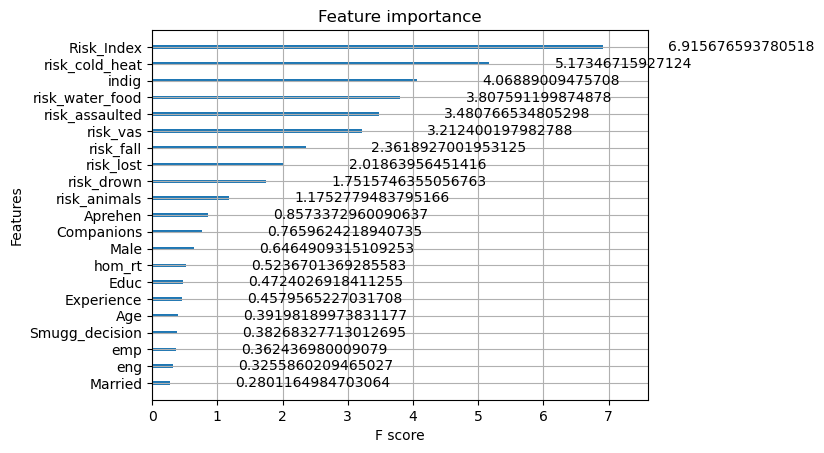

In [40]:
import xgboost as xgb
# Plot feature importance based on gain (how much each feature contributes to making predictions)
xgb.plot_importance(xgb_model, importance_type='gain')

# Alternatively, get the feature importances directly
importance = xgb_model.get_booster().get_score(importance_type='gain')
print(importance)

In [52]:
# Trained a NN with Leaky ReLU beccause ReLu was encountering the dying Relu problem. This happens
# when neurons using the activation fuction get "stuck" in a state where they output zero from any 
# point. This happens when the input ot the neuron becomes negative, and since ReLU outputs
#zero fro any negative input, the neuron stops contributing to learning. 

import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import StandardScaler
import numpy as np

# Define the Neural Network class with Leaky ReLU
class NeuralNet(nn.Module):
    def __init__(self, input_size):
        super(NeuralNet, self).__init__()
        self.fc1 = nn.Linear(input_size, 64)
        self.bn1 = nn.BatchNorm1d(64)
        self.fc2 = nn.Linear(64, 32)
        self.bn2 = nn.BatchNorm1d(32)
        self.fc3 = nn.Linear(32, 1)

    def forward(self, x):
        x = F.leaky_relu(self.bn1(self.fc1(x)), negative_slope=0.01)
        x = F.leaky_relu(self.bn2(self.fc2(x)), negative_slope=0.01)
        x = torch.sigmoid(self.fc3(x))
        return x

# Data Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

# Convert the scaled data to PyTorch tensors
X_train_tensor = torch.tensor(X_train_scaled, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32).view(-1, 1)

# Set up Stratified K-Fold Cross Validation
n_splits = 5
skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)

#Early stopping criteria
early_stopping_patience = 10  # Stop after 10 epochs with no improvement
best_val_loss = float('inf')
patience_counter = 0

# Store metrics
accuracy_list = []
precision_list = []
recall_list = []
f1_list = []

# Perform K-Fold Cross Validation
for fold, (train_idx, val_idx) in enumerate(skf.split(X_train_tensor, y_train)):
    print(f'Fold {fold + 1}/{n_splits}')

    # Create train and validation splits
    X_train_fold = X_train_tensor[train_idx]
    y_train_fold = y_train_tensor[train_idx]
    X_val_fold = X_train_tensor[val_idx]
    y_val_fold = y_train_tensor[val_idx]

    # Initialize the model, optimizer, and loss function
    input_size = X_train_fold.shape[1]
    model = NeuralNet(input_size)
    criterion = nn.BCELoss()  # Binary Cross-Entropy Loss
    optimizer = optim.Adam(model.parameters(), lr=0.001)

    # Train the model
    epochs = 100
    for epoch in range(epochs):
        model.train()
        optimizer.zero_grad()
        outputs = model(X_train_fold)
        loss = criterion(outputs, y_train_fold)
        loss.backward()
        optimizer.step()

    # Validation phase
        model.eval()
        with torch.no_grad():
            val_outputs = model(X_val_fold)
            val_loss = criterion(val_outputs, y_val_fold)

        # Check for early stopping
        if val_loss < best_val_loss:
            best_val_loss = val_loss
            patience_counter = 0
        else:
            patience_counter += 1

        # Print loss every 10 epochs
        if (epoch + 1) % 10 == 0:
            print(f'Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.4f}')

    # Evaluate the model on the validation set
    model.eval()
    with torch.no_grad():
        val_outputs = model(X_val_fold)
        val_outputs = (val_outputs > 0.5).float()  # Thresholding to get binary predictions

        # Convert tensors to NumPy arrays for metric computation
        y_val_np = y_val_fold.numpy()
        y_pred_np = val_outputs.numpy()

        # Calculate metrics
        accuracy = accuracy_score(y_val_np, y_pred_np)
        precision = precision_score(y_val_np, y_pred_np)
        recall = recall_score(y_val_np, y_pred_np)
        f1 = f1_score(y_val_np, y_pred_np)

        # Store metrics
        accuracy_list.append(accuracy)
        precision_list.append(precision)
        recall_list.append(recall)
        f1_list.append(f1)

        print(f'Fold {fold + 1} -- Accuracy: {accuracy:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}, F1-Score: {f1:.4f}')

# Print the average of the metrics across all folds
print(f'Average Accuracy: {np.mean(accuracy_list):.4f}')
print(f'Average Precision: {np.mean(precision_list):.4f}')
print(f'Average Recall: {np.mean(recall_list):.4f}')
print(f'Average F1-Score: {np.mean(f1_list):.4f}')



Fold 1/5
Epoch [10/100], Loss: 0.5236
Epoch [20/100], Loss: 0.4522
Epoch [30/100], Loss: 0.4044
Epoch [40/100], Loss: 0.3668
Epoch [50/100], Loss: 0.3340
Epoch [60/100], Loss: 0.3016
Epoch [70/100], Loss: 0.2675
Epoch [80/100], Loss: 0.2309
Epoch [90/100], Loss: 0.1923
Epoch [100/100], Loss: 0.1542
Fold 1 -- Accuracy: 0.9912, Precision: 0.9810, Recall: 0.9537, F1-Score: 0.9671
Fold 2/5
Epoch [10/100], Loss: 0.4647
Epoch [20/100], Loss: 0.3997
Epoch [30/100], Loss: 0.3552
Epoch [40/100], Loss: 0.3203
Epoch [50/100], Loss: 0.2890
Epoch [60/100], Loss: 0.2584
Epoch [70/100], Loss: 0.2261
Epoch [80/100], Loss: 0.1913
Epoch [90/100], Loss: 0.1551
Epoch [100/100], Loss: 0.1224
Fold 2 -- Accuracy: 0.9899, Precision: 0.9630, Recall: 0.9630, F1-Score: 0.9630
Fold 3/5
Epoch [10/100], Loss: 0.6035
Epoch [20/100], Loss: 0.5184
Epoch [30/100], Loss: 0.4558
Epoch [40/100], Loss: 0.4044
Epoch [50/100], Loss: 0.3600
Epoch [60/100], Loss: 0.3193
Epoch [70/100], Loss: 0.2800
Epoch [80/100], Loss: 0.2413